In [319]:
import pandas as pd

In [320]:
data = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df = data.copy()

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [322]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [323]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [324]:
df.duplicated().sum()

403

In [325]:
df.rename(columns={"v1":"spam_ham","v2":"content"},inplace=True)

In [326]:
df = df.drop_duplicates(keep="first")

In [327]:
df.shape

(5169, 2)

In [328]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [329]:
df["spam_ham"] = encoder.fit_transform(df["spam_ham"])

In [330]:
df.sample(5)

,spam_ham,content
1279,0,Waiting 4 my tv show 2 start lor... U leh stil...
4678,0,Sry da..jst nw only i came to home..
1560,0,"Just got some gas money, any chance you and th..."
5509,0,Lol they were mad at first but then they woke ...
1733,1,"Hi, this is Mandy Sullivan calling from HOTMIX..."


In [331]:
df["spam_ham"].value_counts()

spam_ham
0    4516
1     653
Name: count, dtype: int64

In [332]:
import nltk

In [333]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [334]:
df["num_char"] = df["content"].apply(len)

In [335]:
df["num_words"] = df['content'].apply(lambda x:len(nltk.tokenize.word_tokenize(x)))

In [336]:
df["num_sentence"] = df["content"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [337]:
df.sample(5)

,spam_ham,content,num_char,num_words,num_sentence
1021,1,Guess what! Somebody you know secretly fancies...,156,29,4
1393,0,Oh ok..,7,3,1
3992,0,Nimbomsons. Yep phone knows that one. Obviousl...,70,15,3
583,0,my ex-wife was not able to have kids. Do you w...,63,16,2
3351,0,Call him and say you not coming today ok and t...,82,19,1


In [338]:
df.describe()

,spam_ham,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [339]:
df[df["spam_ham"] == 1][["num_char","num_words","num_sentence"]].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [340]:
df[df["spam_ham"] == 0][["num_char","num_words","num_sentence"]].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

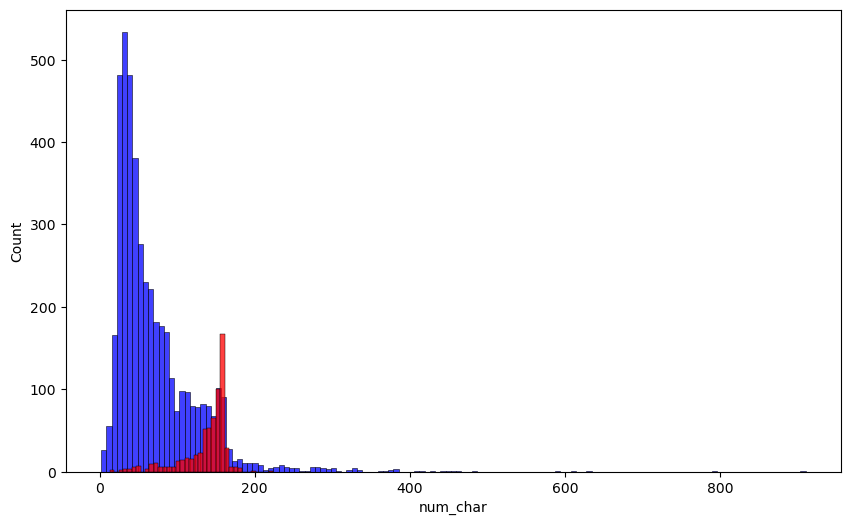

In [342]:
plt.figure(figsize=(10,6))

sns.histplot(df[df["spam_ham"]==0]["num_char"], color="blue")
sns.histplot(df[df["spam_ham"]==1]["num_char"], color="red")

plt.show()

<Axes: >

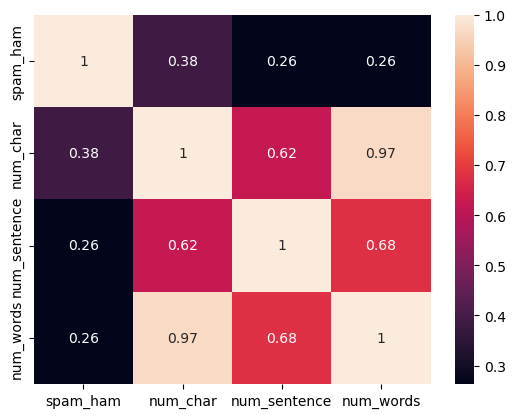

In [343]:
sns.heatmap(df[["spam_ham","num_char","num_sentence","num_words"]].corr(),annot=True)

In [344]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [345]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

In [346]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    l = []

    for i in text:
        if i.isalnum():
            l.append(i)

    text = l[:]
    l.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            l.append(i)
    text = l[:]
    l.clear()
    for i in text:
        l.append(ps.stem(i))
    return " ".join(l)

In [347]:
df["transformed"] = df["content"].apply(transform_text)

In [348]:
df.sample(5)

,spam_ham,content,num_char,num_words,num_sentence,transformed
413,0,Bring home some Wendy =D,24,5,1,bring home wendi
5323,0,Aah bless! How's your arm?,26,8,2,aah bless arm
4516,0,"Men always needs a beautiful, intelligent, car...",125,25,2,men alway need beauti intellig care love adjus...
3804,0,Dude while were makin those weirdy brownies my...,88,17,2,dude makin weirdi browni sister made awesom co...
4856,0,Thanks and ! Or bomb and date as my phone wan...,58,14,2,thank bomb date phone want say


In [349]:
!pip install wordcloud

In [350]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color="white")

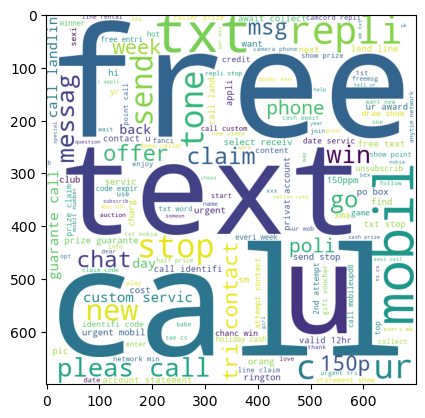

In [351]:
spam_wc = wc.generate(df[df["spam_ham"] == 1]["transformed"].str.cat(sep=" "))
plt.imshow(spam_wc)

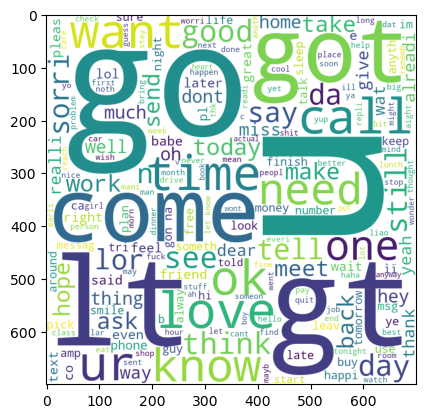

In [352]:
ham_wc = wc.generate(df[df["spam_ham"] == 0]["transformed"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [353]:
spam_freq_words = []

for msg in df[df['spam_ham']==1]["transformed"].tolist():
    for word in msg.split():
        spam_freq_words.append(word)
        

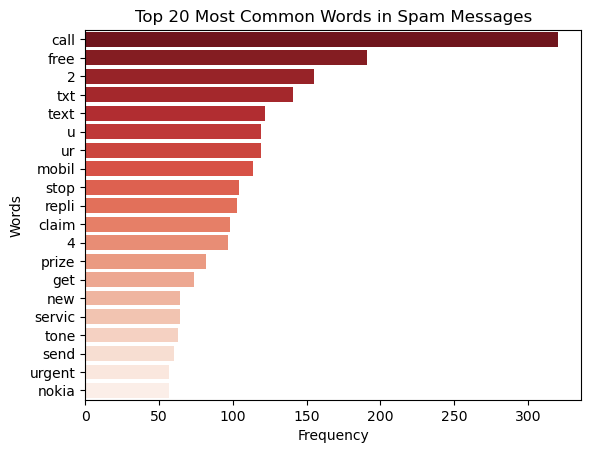

In [354]:
from collections import Counter

spam_counts = Counter(spam_freq_words).most_common(20)

spam_df = pd.DataFrame(spam_counts, columns=["word", "frequency"])


sns.barplot(x="frequency", y="word", data=spam_df,palette="Reds_r",dodge=False ,hue="word")
plt.title("Top 20 Most Common Words in Spam Messages")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [355]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [356]:
x = tfd.fit_transform(df["transformed"]).toarray()

In [357]:
x.shape

(5169, 3000)

In [358]:
y = df["spam_ham"].values

In [359]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [360]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss.split(x, y))

x_train, x_test = x[train_idx], x[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [361]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [362]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

Accuracy: 0.8568665377176016
The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       903
           1       0.46      0.80      0.59       131

    accuracy                           0.86      1034
   macro avg       0.72      0.83      0.75      1034
weighted avg       0.90      0.86      0.87      1034



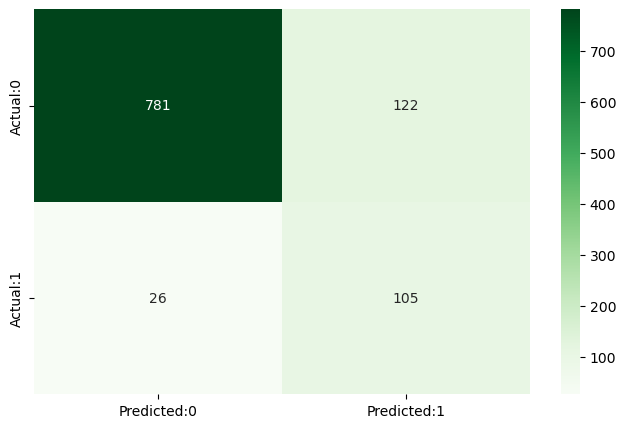

In [363]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

print(f"Accuracy: {accuracy_score(y_test, y_pred1)}")
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred1))

cm = confusion_matrix(y_test, y_pred1)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

In [364]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)

Accuracy: 0.9738878143133463
The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       903
           1       0.98      0.81      0.89       131

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



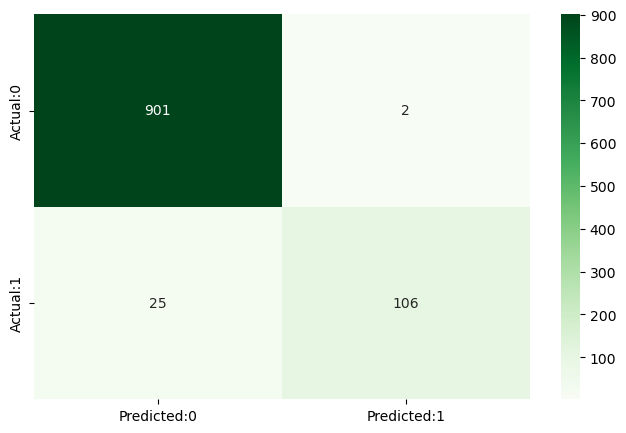

In [365]:
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred2))

cm = confusion_matrix(y_test, y_pred2)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

In [366]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

Accuracy: 0.9825918762088974
The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.87      0.93       131

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



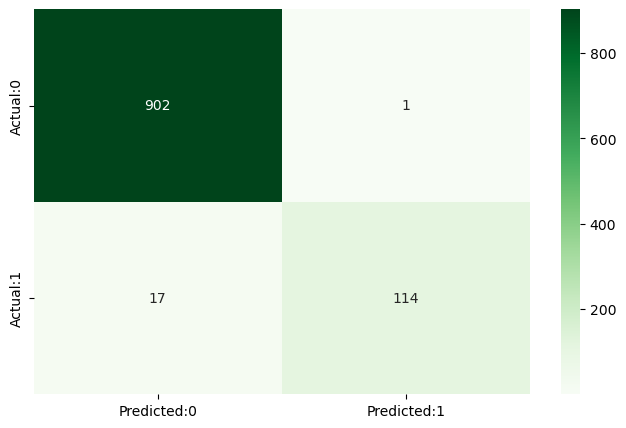

In [367]:
print(f"Accuracy: {accuracy_score(y_test, y_pred3)}")
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred3))

cm = confusion_matrix(y_test, y_pred3)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

In [368]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50,random_state=42)

In [369]:
rf.fit(x_train,y_train)
y_pred5 = rf.predict(x_test)

Accuracy: 0.9738878143133463
The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       903
           1       0.97      0.82      0.89       131

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



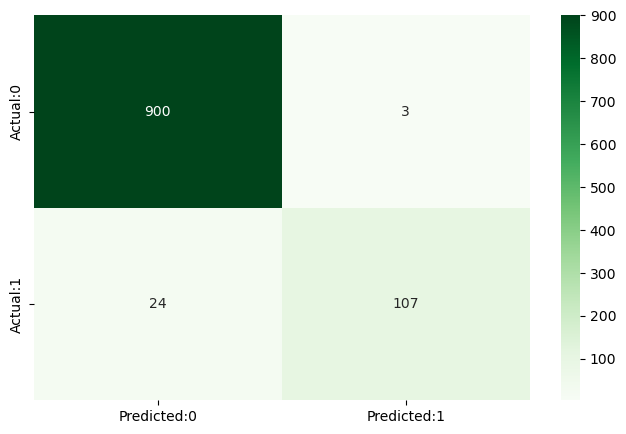

In [370]:
print(f"Accuracy: {accuracy_score(y_test, y_pred5)}")
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred5))

cm = confusion_matrix(y_test, y_pred5)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

In [371]:
import pickle

In [372]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))